In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_all.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_all.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_all.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_all.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 42), (4499, 1), (4233, 43), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:43]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],42, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_all=model.fit(X_train, y_train, batch_size=256, epochs=250, validation_data=(X_test, y_test))

Train...
Epoch 1/250
18/18 [==============================] - 13s 350ms/step - loss: 2.2855 - accuracy: 0.1258 - val_loss: 2.2921 - val_accuracy: 0.1169
Epoch 2/250
18/18 [==============================] - 7s 417ms/step - loss: 2.2002 - accuracy: 0.1860 - val_loss: 2.2950 - val_accuracy: 0.1512
Epoch 3/250
18/18 [==============================] - 5s 271ms/step - loss: 2.1316 - accuracy: 0.2060 - val_loss: 2.1766 - val_accuracy: 0.1609
Epoch 4/250
18/18 [==============================] - 5s 263ms/step - loss: 2.0760 - accuracy: 0.2452 - val_loss: 2.1520 - val_accuracy: 0.1779
Epoch 5/250
18/18 [==============================] - 5s 297ms/step - loss: 2.0302 - accuracy: 0.2521 - val_loss: 2.1341 - val_accuracy: 0.1921
Epoch 6/250
18/18 [==============================] - 5s 272ms/step - loss: 1.9858 - accuracy: 0.2685 - val_loss: 2.0843 - val_accuracy: 0.2105
Epoch 7/250
18/18 [==============================] - 4s 247ms/step - loss: 1.9370 - accuracy: 0.2894 - val_loss: 2.1152 - val_accura

Epoch 51/250
18/18 [==============================] - 9s 521ms/step - loss: 1.0079 - accuracy: 0.6533 - val_loss: 2.0300 - val_accuracy: 0.4023
Epoch 52/250
18/18 [==============================] - 9s 497ms/step - loss: 0.9747 - accuracy: 0.6617 - val_loss: 2.0942 - val_accuracy: 0.3988
Epoch 53/250
18/18 [==============================] - 9s 533ms/step - loss: 0.9804 - accuracy: 0.6586 - val_loss: 1.9859 - val_accuracy: 0.4189
Epoch 54/250
18/18 [==============================] - 9s 533ms/step - loss: 0.9583 - accuracy: 0.6664 - val_loss: 1.9513 - val_accuracy: 0.4207
Epoch 55/250
18/18 [==============================] - 9s 482ms/step - loss: 0.9312 - accuracy: 0.6804 - val_loss: 1.9530 - val_accuracy: 0.4224
Epoch 56/250
18/18 [==============================] - 9s 531ms/step - loss: 0.9148 - accuracy: 0.6846 - val_loss: 1.9273 - val_accuracy: 0.4323
Epoch 57/250
18/18 [==============================] - 9s 503ms/step - loss: 0.8836 - accuracy: 0.6986 - val_loss: 2.0048 - val_accuracy:

Epoch 108/250
18/18 [==============================] - 10s 577ms/step - loss: 0.4561 - accuracy: 0.8504 - val_loss: 2.8784 - val_accuracy: 0.4422
Epoch 109/250
18/18 [==============================] - 9s 537ms/step - loss: 0.4424 - accuracy: 0.8515 - val_loss: 2.8774 - val_accuracy: 0.4429
Epoch 110/250
18/18 [==============================] - 10s 549ms/step - loss: 0.4573 - accuracy: 0.8500 - val_loss: 3.0778 - val_accuracy: 0.4056
Epoch 111/250
18/18 [==============================] - 9s 524ms/step - loss: 0.4531 - accuracy: 0.8509 - val_loss: 3.1006 - val_accuracy: 0.4163
Epoch 112/250
18/18 [==============================] - 9s 523ms/step - loss: 0.4361 - accuracy: 0.8553 - val_loss: 2.8514 - val_accuracy: 0.4347
Epoch 113/250
18/18 [==============================] - 9s 540ms/step - loss: 0.4029 - accuracy: 0.8655 - val_loss: 2.9176 - val_accuracy: 0.4337
Epoch 114/250
18/18 [==============================] - 9s 523ms/step - loss: 0.4305 - accuracy: 0.8529 - val_loss: 3.0087 - val_

18/18 [==============================] - 9s 500ms/step - loss: 0.2012 - accuracy: 0.9331 - val_loss: 3.9892 - val_accuracy: 0.4271
Epoch 165/250
18/18 [==============================] - 9s 502ms/step - loss: 0.1883 - accuracy: 0.9407 - val_loss: 4.5060 - val_accuracy: 0.4207
Epoch 166/250
18/18 [==============================] - 11s 603ms/step - loss: 0.2128 - accuracy: 0.9273 - val_loss: 3.6982 - val_accuracy: 0.4403
Epoch 167/250
18/18 [==============================] - 12s 670ms/step - loss: 0.2136 - accuracy: 0.9280 - val_loss: 4.2741 - val_accuracy: 0.4307
Epoch 168/250
18/18 [==============================] - 11s 599ms/step - loss: 0.2435 - accuracy: 0.9195 - val_loss: 3.9156 - val_accuracy: 0.4288
Epoch 169/250
18/18 [==============================] - 9s 529ms/step - loss: 0.3108 - accuracy: 0.8944 - val_loss: 3.6125 - val_accuracy: 0.4373
Epoch 170/250
18/18 [==============================] - 9s 525ms/step - loss: 0.3311 - accuracy: 0.8893 - val_loss: 3.6155 - val_accuracy: 0.4

18/18 [==============================] - 9s 516ms/step - loss: 0.1001 - accuracy: 0.9667 - val_loss: 4.6515 - val_accuracy: 0.4148
Epoch 221/250
18/18 [==============================] - 10s 546ms/step - loss: 0.1487 - accuracy: 0.9511 - val_loss: 4.3632 - val_accuracy: 0.4210
Epoch 222/250
18/18 [==============================] - 10s 538ms/step - loss: 0.1290 - accuracy: 0.9571 - val_loss: 4.8442 - val_accuracy: 0.4167
Epoch 223/250
18/18 [==============================] - 9s 528ms/step - loss: 0.1414 - accuracy: 0.9560 - val_loss: 4.6796 - val_accuracy: 0.4134
Epoch 224/250
18/18 [==============================] - 9s 504ms/step - loss: 0.1785 - accuracy: 0.9407 - val_loss: 4.1744 - val_accuracy: 0.4257
Epoch 225/250
18/18 [==============================] - 9s 535ms/step - loss: 0.1665 - accuracy: 0.9407 - val_loss: 4.3066 - val_accuracy: 0.4283
Epoch 226/250
18/18 [==============================] - 9s 518ms/step - loss: 0.1479 - accuracy: 0.9489 - val_loss: 4.4960 - val_accuracy: 0.42

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 20s 128ms/step - loss: 5.2145 - accuracy: 0.4191
Pre-training accuracy: 41.9088%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9875527620315552
Testing Accuracy:  0.41908812522888184


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.41908812522888184


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[2 3 2 ... 9 9 1]


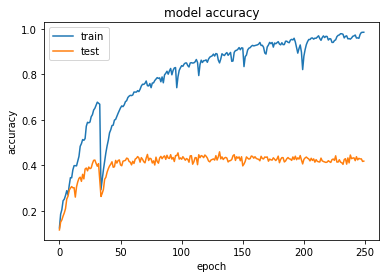

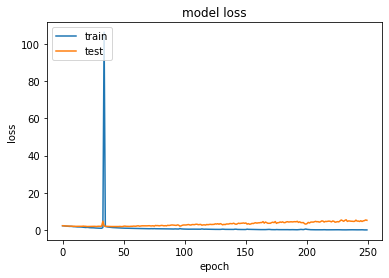

In [14]:
# summarize history for accuracy
plt.plot(model_all.history['accuracy'])
plt.plot(model_all.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_all.history['loss'])
plt.plot(model_all.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Avg Test accuracy and Standart Devision 

In [16]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.285467,0.125806,2.292093,0.116938
1,2.200187,0.186041,2.295005,0.151193
2,2.131588,0.206046,2.176616,0.160879
3,2.075957,0.245166,2.151951,0.177888
4,2.030167,0.252056,2.134078,0.192062
...,...,...,...,...
245,0.127940,0.958658,4.578619,0.431373
246,0.077641,0.975995,4.900020,0.428774
247,0.053838,0.984219,5.046882,0.429010
248,0.047916,0.985108,5.413818,0.417907


In [17]:
print(train_hist["val_accuracy"].describe())

count    250.000000
mean       0.408923
std        0.052327
min        0.116938
25%        0.413418
50%        0.425112
75%        0.432790
max        0.459957
Name: val_accuracy, dtype: float64


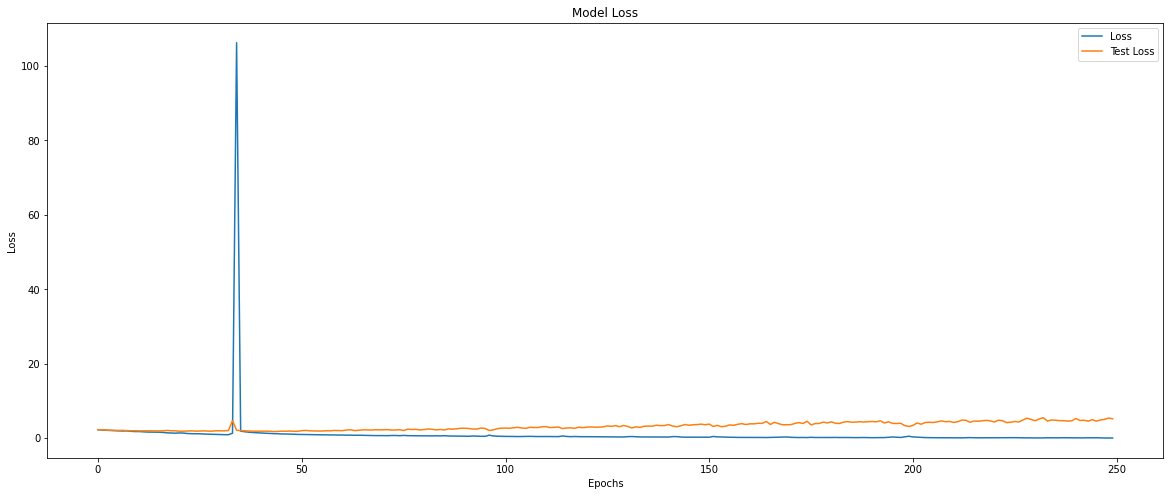

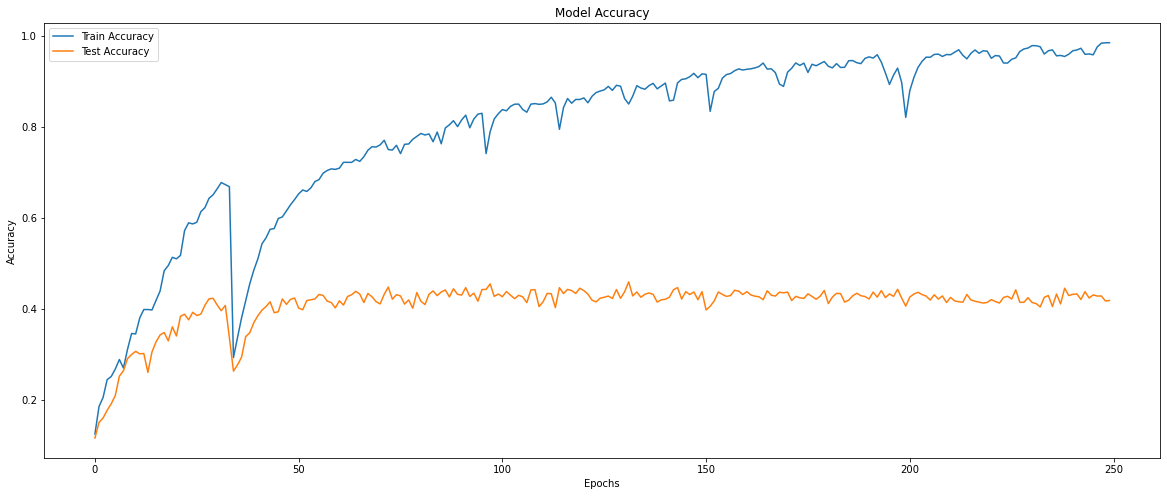

In [18]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[103   5  43  82  27  38   6  94  47  55]
 [  1 145   8  11   3   4   0  10   3  36]
 [ 18   4 216  83  14   6   8  12  70  69]
 [  9   5  74 273  46   5  15   7  33  33]
 [ 25  18  22  44 167   8  18 129  11  58]
 [ 85  43  11  29  21 155   3  56  14  66]
 [ 12   0  11  32   4   2 108   3   8   4]
 [ 14  29  10  21 128  21   5 157  28  39]
 [ 11   3  61  56  39   1   3   4 181  34]
 [ 15  26  74  35  30   6   0  13  32 269]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.35      0.21      0.26       500
           1       0.52      0.66      0.58       221
           2       0.41      0.43      0.42       500
           3       0.41      0.55      0.47       500
           4       0.35      0.33      0.34       500
           5       0.63      0.32      0.43       483
           6       0.65      0.59      0.62       184
           7       0.32      0.35      0.34       452
           8       0.42      0.